## Dropouts
#### So dropouts are used to reduce the overfitting which occurs in neural network .
#### Dropouts means randomly removing some node in the hidden layer or input layer in each epoch .
#### So why dropout are used to reduce overfitting?
#### So the main reason is if we remove any node lead to different neural network structure and diff neural network structure means different output and it can give us different model wich is not overfitted to data
#### So the dropout are randomly removed in each epoch lead to n number of different model and this is great sometime but the main error here is that as removing an node from the layer will lead to completely loss of the weight and when next epoch suppose it is restored then their is the weight problem in the gradient descesnt i.e backpropogation issuse in some cases
#### Dropout sometimes give very less significance to some weights


## Lets build and neural network with dropout inserted


In [5]:
### importing essential libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as pt
from sklearn.datasets import make_moons
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.optimizers import Adam
from keras.activations import linear,relu
from keras.layers import Dense,Dropout
from sklearn.model_selection import train_test_split

In [4]:
## leading the data
X,y = make_moons(n_samples=500,random_state=42,noise=0.25)

In [6]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)
scalar = StandardScaler()
X_train = scalar.fit_transform(X_train)
X_test = scalar.transform(X_test)
print(f"X_train shape :{X_train.shape}")
print(f"y_train shape : {y_train.shape}")

X_train shape :(400, 2)
y_train shape : (400,)


In [9]:
pt.scatter(x=X[:,0],y=X[:,1],color=y,labels=['Feature1','feature2'])

### Some explaination about dropout layer
#### syntax: Dropout(p)
#### Here the p is the % of node removing from that layer
### Q. As we reomove some nodes in the training data randomly but when we wnat to calculate the X_test the which node we have to remove how we know ?
### -> So here we just multiply each node weigth with (1-p) i.e w x (1-p)
#### Higher the value of p lead to overfitting and lower the value of p lead to under fitting
#### Some intitial guess for some architecture
#### 1. CNN - p = 40-50 %
#### 2. RNN - p = 20-30 %
#### 3. ANN - p = 10-50 %


In [12]:
### Building model with drop out layes
model = Sequential([
    Dense(12,activation='relu',input_dim=2),
    Dense(6,activation='relu'),
    Dropout(0.25), ## Removing 25% nodes from First hidden layer
    Dense(1,activation='sigmoid')
])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



In [13]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 12)             │            36 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 6)              │            78 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 6)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │             7 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 121 (484.00 B)

 Trainable params: 121 (484.00 B)

 Non-trainable params: 0 (0.00 B)

In [18]:
adam = Adam(learning_rate=0.01)
model.compile(optimizer=adam,loss='binary_crossentropy',metrics=['accuracy','precision'])

In [19]:
history = model.fit(
    X_train,y_train,
    epochs = 100,
    validation_split = 0.2
)


Epoch 1/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 40ms/step - accuracy: 0.5835 - loss: 0.6667 - precision: 0.5369 - val_accuracy: 0.8250 - val_loss: 0.5208 - val_precision: 0.7436
Epoch 2/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7847 - loss: 0.4946 - precision: 0.7824 - val_accuracy: 0.8250 - val_loss: 0.4198 - val_precision: 0.7436
Epoch 3/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8103 - loss: 0.4172 - precision: 0.8127 - val_accuracy: 0.8250 - val_loss: 0.3784 - val_precision: 0.7436
Epoch 4/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.7867 - loss: 0.4057 - precision: 0.7694 - val_accuracy: 0.8375 - val_loss: 0.3628 - val_precision: 0.7778
Epoch 5/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8688 - loss: 0.3222 - precision: 0.9016 - val_accuracy: 0.8500 - val_loss: 0.3643 - val_precision: 0.8000
Epoch 6/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.8410 - loss: 0.3334 - precision: 0.8630 - val_accuracy: 0.8500 - val_loss:

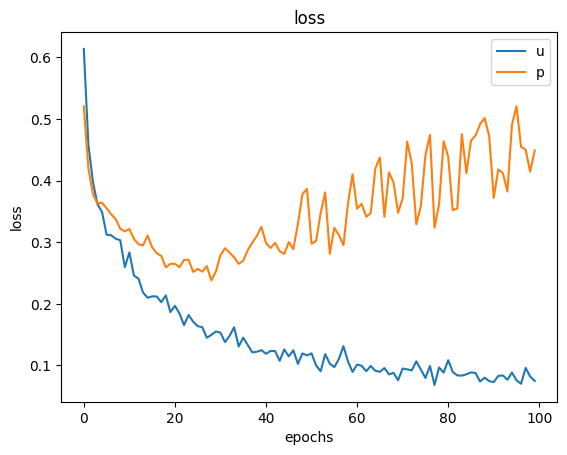

In [23]:
plt.title("loss")
plt.plot(history.history['loss'],label=['training loss'])
plt.plot(history.history['val_loss'],label=['validation loss'])
plt.xlabel("epochs")
plt.ylabel('loss')
plt.legend('upper right')
plt.show()

Epoch 1/100


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 40ms/step - accuracy: 0.6151 - loss: 0.6126 - precision: 0.6860 - val_accuracy: 0.8000 - val_loss: 0.4966 - val_precision: 0.8148
Epoch 2/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8095 - loss: 0.5495 - precision: 0.9138 - val_accuracy: 0.8250 - val_loss: 0.4354 - val_precision: 0.7879
Epoch 3/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8582 - loss: 0.4928 - precision: 0.9247 - val_accuracy: 0.8375 - val_loss: 0.4129 - val_precision: 0.7941
Epoch 4/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8639 - loss: 0.4564 - precision: 0.8974 - val_accuracy: 0.8375 - val_loss: 0.4032 - val_precision: 0.7941
Epoch 5/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.8531 - loss: 0.4286 - precision: 0.8405 - val_accuracy: 0.8250 - val_loss: 0.4023 - val_precision: 0.7714
Epoch 6/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8847 - loss: 0.4177 - precision: 0.9079 - val_accuracy: 0.8125 - val_loss: 0.3874 - val

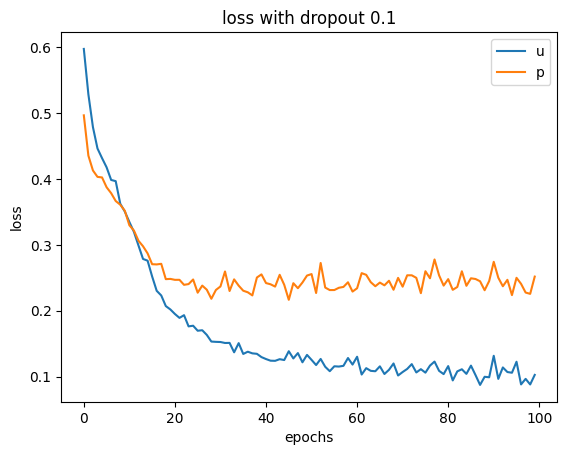

Epoch 1/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 41ms/step - accuracy: 0.5804 - loss: 0.6609 - precision: 0.5658 - val_accuracy: 0.8000 - val_loss: 0.5486 - val_precision: 0.7179
Epoch 2/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7873 - loss: 0.5204 - precision: 0.8271 - val_accuracy: 0.8500 - val_loss: 0.4019 - val_precision: 0.8000
Epoch 3/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8109 - loss: 0.4061 - precision: 0.8839 - val_accuracy: 0.8375 - val_loss: 0.3422 - val_precision: 0.7941
Epoch 4/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8460 - loss: 0.3416 - precision: 0.9004 - val_accuracy: 0.8250 - val_loss: 0.3668 - val_precision: 0.7714
Epoch 5/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8828 - loss: 0.3019 - precision: 0.8806 - val_accuracy: 0.8375 - val_loss: 0.3620 - val_precision: 0.7778
Epoch 6/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8710 - loss: 0.3112 - precision: 0.8678 - val_accuracy: 0.8375 - val_loss: 0.

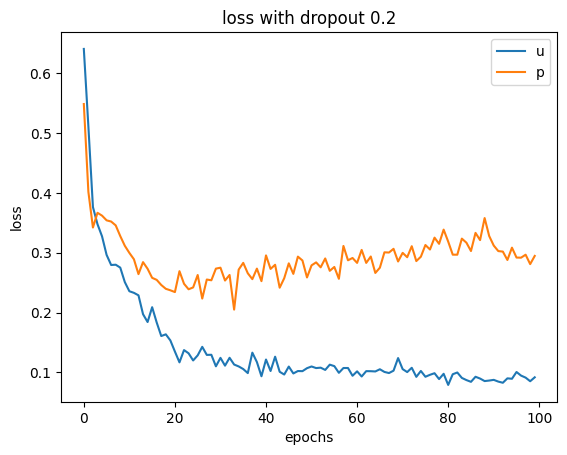

Epoch 1/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 44ms/step - accuracy: 0.5328 - loss: 0.6711 - precision: 0.5317 - val_accuracy: 0.8750 - val_loss: 0.5016 - val_precision: 0.8485
Epoch 2/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7932 - loss: 0.5402 - precision: 0.9075 - val_accuracy: 0.8625 - val_loss: 0.3967 - val_precision: 0.8056
Epoch 3/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8315 - loss: 0.4320 - precision: 0.8193 - val_accuracy: 0.8500 - val_loss: 0.3375 - val_precision: 0.7838
Epoch 4/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8165 - loss: 0.3949 - precision: 0.8216 - val_accuracy: 0.8250 - val_loss: 0.3267 - val_precision: 0.7568
Epoch 5/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7885 - loss: 0.4340 - precision: 0.7564 - val_accuracy: 0.8375 - val_loss: 0.3273 - val_precision: 0.7778
Epoch 6/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8203 - loss: 0.4350 - precision: 0.8169 - val_accuracy: 0.8500 - val_loss:

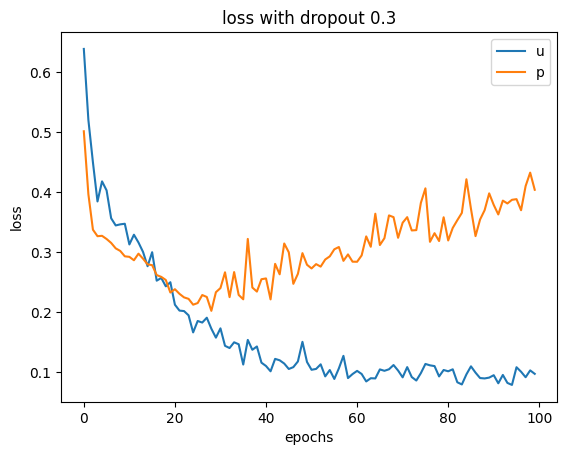

Epoch 1/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 40ms/step - accuracy: 0.6218 - loss: 0.6406 - precision: 0.6062 - val_accuracy: 0.8250 - val_loss: 0.5058 - val_precision: 0.7436
Epoch 2/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.7667 - loss: 0.4797 - precision: 0.7966 - val_accuracy: 0.8250 - val_loss: 0.3951 - val_precision: 0.7436
Epoch 3/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8326 - loss: 0.3682 - precision: 0.8489 - val_accuracy: 0.8125 - val_loss: 0.3726 - val_precision: 0.7368
Epoch 4/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7947 - loss: 0.4014 - precision: 0.7991 - val_accuracy: 0.8250 - val_loss: 0.3629 - val_precision: 0.7568
Epoch 5/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.8299 - loss: 0.3673 - precision: 0.8962 - val_accuracy: 0.8375 - val_loss: 0.3621 - val_precision: 0.7941
Epoch 6/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7893 - loss: 0.4009 - precision: 0.8711 - val_accuracy: 0.8375 - val_loss: 

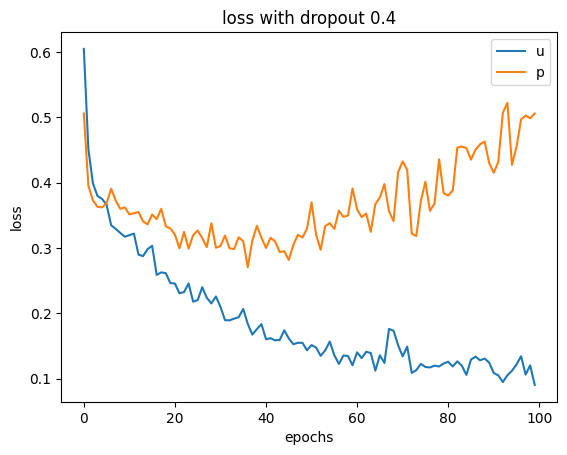

Epoch 1/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 38ms/step - accuracy: 0.5097 - loss: 0.6924 - precision: 0.5147 - val_accuracy: 0.8000 - val_loss: 0.5463 - val_precision: 0.7073
Epoch 2/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6647 - loss: 0.5746 - precision: 0.7668 - val_accuracy: 0.8125 - val_loss: 0.4480 - val_precision: 0.7250
Epoch 3/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.6509 - loss: 0.5149 - precision: 0.7676 - val_accuracy: 0.8250 - val_loss: 0.3888 - val_precision: 0.7436
Epoch 4/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7137 - loss: 0.4812 - precision: 0.8374 - val_accuracy: 0.8125 - val_loss: 0.3620 - val_precision: 0.7368
Epoch 5/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.6718 - loss: 0.4711 - precision: 0.8569 - val_accuracy: 0.8125 - val_loss: 0.3544 - val_precision: 0.7368
Epoch 6/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7248 - loss: 0.4213 - precision: 0.8135 - val_accuracy: 0.8125 - val_loss: 0.

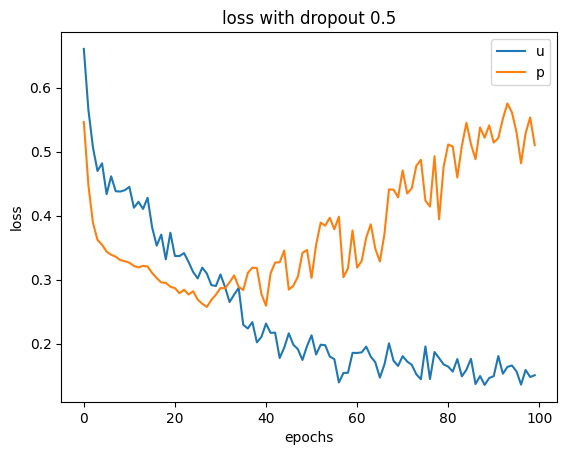

In [26]:
import time
def train_model_with_dropout(dropout_list):
  for drop in dropout_list:
    model = Sequential([
      Dense(12,activation='relu',input_dim=2),
      Dense(6,activation='relu'),
      Dropout(drop), ## Removing 25% nodes from First hidden layer
      Dense(1,activation='sigmoid')
    ])
    adam = Adam(learning_rate=0.01)
    model.compile(optimizer=adam,loss='binary_crossentropy',metrics=['accuracy','precision'])
    history = model.fit(
      X_train,y_train,
      epochs = 100,
      validation_split = 0.2
    )
    plt.title(f"loss with dropout {drop}")
    plt.plot(history.history['loss'],label=['training loss'])
    plt.plot(history.history['val_loss'],label=['validation loss'])
    plt.xlabel("epochs")
    plt.ylabel('loss')
    plt.legend('upper right')
    plt.show()
    time.sleep(5)


list = [0.1,0.2,0.3,0.4,0.5]
train_model_with_dropout(list)